In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, MinMaxScaler


In [89]:
df = pd.read_csv('train.csv')

In [90]:
df.shape

(10886, 12)

In [91]:
df_mini = df.drop(columns=['season', 'holiday', 'workingday'])

In [92]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Create a dataframe only storing the number of bikes rented

Sums of bikes rented will be easier to calculate if we drop all weather data

In [93]:
df_simple = df.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'])

In [94]:
df_simple_reindexed = df_simple.set_index(pd.to_datetime(df['datetime']))

In [95]:
df_simple_reindexed.head()

,datetime,casual,registered,count
datetime,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,0,1,1


### Analysing weekly data

In [96]:
df_weekly = df_simple_reindexed.resample('7D').sum()

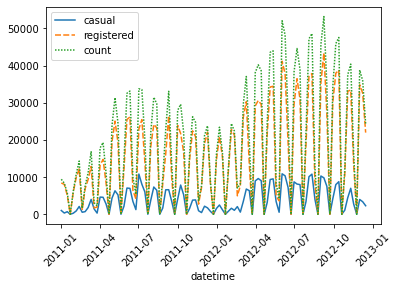

In [97]:
sns.lineplot(data=df_weekly)

plt.xticks(rotation=45)
plt.show()

### Analysing monthly data

In [98]:
df_monthly = df_simple_reindexed.resample('30D').sum()

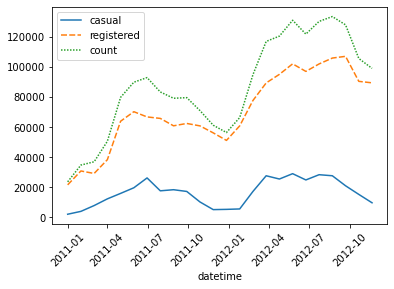

In [99]:
sns.lineplot(data=df_monthly)

plt.xticks(rotation=45)
plt.show()

### Analysing hourly data

In [100]:
df_by_time = df_simple

In [101]:
df_by_time['time'] = df_by_time['datetime'].dt.time

In [102]:
df_by_time = df_by_time.drop(columns=['datetime'])

In [103]:
df_by_time['time'] = df_by_time['time'].astype('str')

In [104]:
df_by_time.set_index(df_by_time['time'], inplace=True)

In [105]:
df_by_time.head()

,casual,registered,count,time
time,,,,
00:00:00,3,13,16,00:00:00
01:00:00,8,32,40,01:00:00
02:00:00,5,27,32,02:00:00
03:00:00,3,10,13,03:00:00
04:00:00,0,1,1,04:00:00


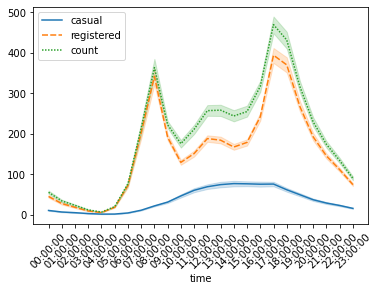

In [106]:
sns.lineplot(data=df_by_time)
plt.xticks(rotation=45);

In [107]:
df_weekdays = df_simple

In [108]:
df_simple

,datetime,casual,registered,count,time
0,2011-01-01 00:00:00,3,13,16,00:00:00
1,2011-01-01 01:00:00,8,32,40,01:00:00
2,2011-01-01 02:00:00,5,27,32,02:00:00
3,2011-01-01 03:00:00,3,10,13,03:00:00
4,2011-01-01 04:00:00,0,1,1,04:00:00
...,...,...,...,...,...
10881,2012-12-19 19:00:00,7,329,336,19:00:00
10882,2012-12-19 20:00:00,10,231,241,20:00:00
10883,2012-12-19 21:00:00,4,164,168,21:00:00
10884,2012-12-19 22:00:00,12,117,129,22:00:00


In [109]:
df_weekdays['day_name'] = df_weekdays['datetime'].dt.day_name()

In [110]:
df_weekdays.set_index(df_weekdays['day_name'], inplace=True)

In [111]:
df_weekdays = df_weekdays.drop(columns=['time', 'datetime', 'day_name'])

In [112]:
df_weekdays.head()

,casual,registered,count
day_name,,,
Saturday,3,13,16
Saturday,8,32,40
Saturday,5,27,32
Saturday,3,10,13
Saturday,0,1,1


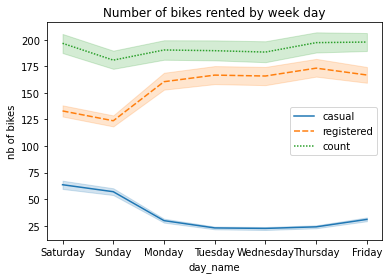

In [113]:
sns.lineplot(data=df_weekdays)
plt.xlabel('day_name')
plt.ylabel('nb of bikes')
plt.title('Number of bikes rented by week day');

### Linear regression

In [114]:
df = pd.read_csv('train.csv')
#df['datetime'] = pd.to_datetime(df['datetime'])
#df.set_index(df['datetime'], inplace=True)


In [115]:
X = df.drop(columns=['count'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 11), (2722, 11), (8164,), (2722,))

In [116]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15


In [117]:
#sns.pairplot(data=df)

In [118]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
X_test['datetime'] = pd.to_datetime(X_test['datetime'])

In [119]:
X_train['date'] = X_train['datetime'].dt.date
X_test['date'] = X_test['datetime'].dt.date
X_train['time'] = X_train['datetime'].dt.hour
X_test['time'] = X_test['datetime'].dt.hour

In [120]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011-07-11,0
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012-05-18,22
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41,2011-04-01,23
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226,2012-09-16,9
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15,2011-02-01,23


In [121]:
X_train.set_index(X_train['datetime'])
X_test.set_index(X_test['datetime'])

X_train = X_train.drop(columns = ['atemp', 'casual', 'registered','datetime','date'])
X_test = X_test.drop(columns = ['atemp', 'casual', 'registered','datetime','date'])

In [122]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,time
2930,3,0,1,1,28.70,65,12.9980,0
7669,2,0,1,1,22.96,52,22.0028,22
1346,2,0,1,1,12.30,61,6.0032,23
9432,3,0,0,1,23.78,60,8.9981,9
453,1,0,1,3,8.20,93,12.9980,23


In [123]:
pipeline_hour = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=24, encode='onehot-dense', strategy='uniform')),
])

In [124]:
pipeline_season = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')),
])

In [125]:
transformer = ColumnTransformer(
    [
        ("hour", pipeline_hour, ['time']),
        #("season", pipeline_season, ['season']),
    ]
)

In [126]:
m = LinearRegression()

In [127]:
X_train_FE = transformer.fit_transform(X_train)
X_test_FE = transformer.transform(X_test)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 8), (2722, 8), (8164,), (2722,))

In [129]:
m.fit(X_train_FE,y_train)

LinearRegression()

In [130]:
ypred = m.predict(X_test_FE)

In [131]:
m.score(pd.DataFrame(X_test_FE), y_test)

0.49765504559585116

In [132]:
m.coef_, m.intercept_

(array([-8.03469711e+14, -8.03469711e+14, -8.03469711e+14, -8.03469711e+14,
        -8.03469711e+14, -8.03469711e+14, -8.03469711e+14, -8.03469711e+14,
        -8.03469711e+14, -8.03469711e+14, -8.03469711e+14, -8.03469711e+14,
        -8.03469711e+14, -8.03469711e+14, -8.03469711e+14, -8.03469711e+14,
        -8.03469711e+14, -8.03469711e+14, -8.03469711e+14, -8.03469711e+14,
        -8.03469711e+14, -8.03469711e+14, -8.03469711e+14, -8.03469711e+14]),
 803469710513877.8)

In [133]:
"""df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index(df['datetime'], inplace=True)
df = df.drop(columns = ['atemp', 'datetime', 'casual', 'registered'])
df = df.resample('1D').agg({'temp':'mean', 'humidity':'mean', 'windspeed': 'mean', 'count':'sum'})
df = df.ffill()"""

"df = pd.read_csv('train.csv')\ndf['datetime'] = pd.to_datetime(df['datetime'])\ndf.set_index(df['datetime'], inplace=True)\ndf = df.drop(columns = ['atemp', 'datetime', 'casual', 'registered'])\ndf = df.resample('1D').agg({'temp':'mean', 'humidity':'mean', 'windspeed': 'mean', 'count':'sum'})\ndf = df.ffill()"